## Exploratory Data Analysis & Introduction

### Exploring Top-Paying Roles and Skills in Data Science

1. __Goal__: Find out the highest-paying jobs and skills in data science.
2. __Method__: Use Python to analyze a real dataset of job postings.
3. __For Job-Seekers__: Use this information to target the best job opportunities.


### Final Deliverables
- _Jupyter Notebooks_: Showcase your Python skills.
- _Summary Page (README.md)_: Summarize your findings.
- _Share Your Project_: Post it on GitHub and LinkedIn.

### Questions to Answer
1. What skills are most needed for the top 3 popular data roles?
2. What are the trending skills for Data Analysts?
3. How much do Data Analysts earn based on their skills?
4. Which skill should Data Analysts learn to maximize demand and pay?

### Exploratory Data Analysis for all Data Roles

#### Roles to Explore

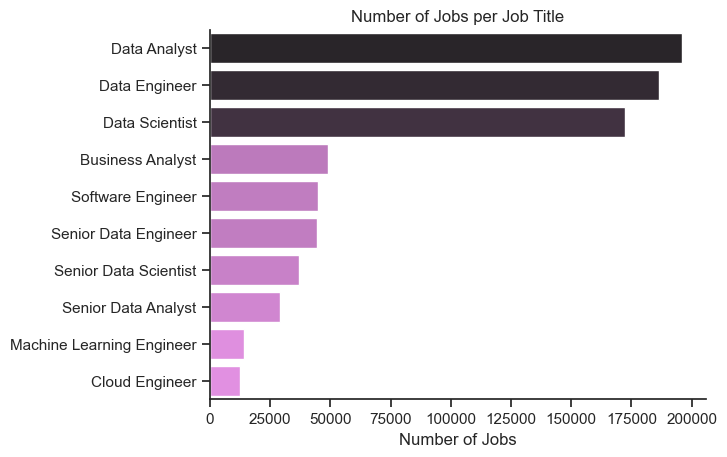

In [14]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:violet_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Countries to Explore

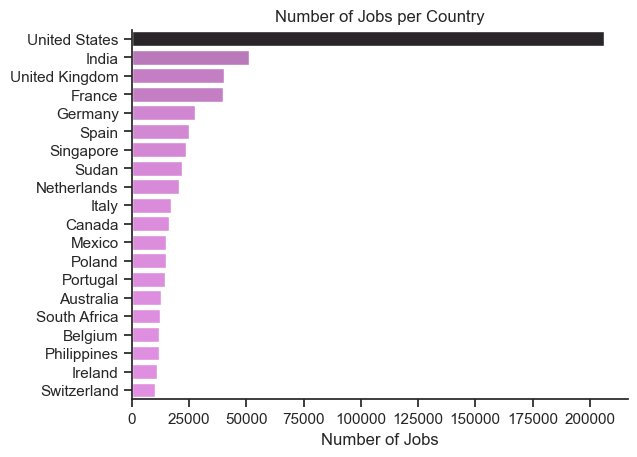

In [15]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:violet_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Companies to Explore

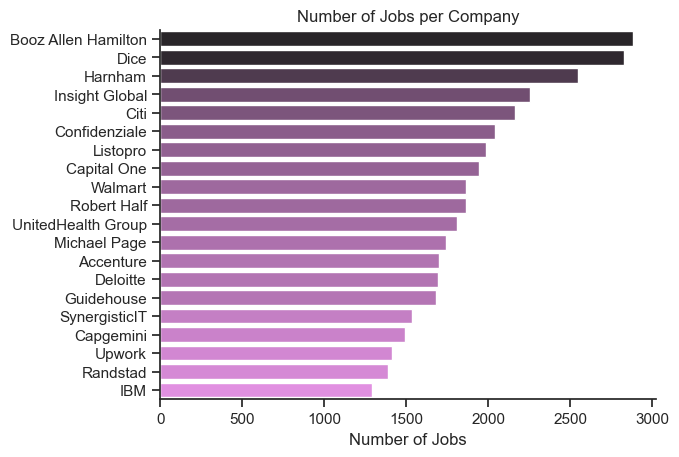

In [13]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:violet_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Job Opportunities

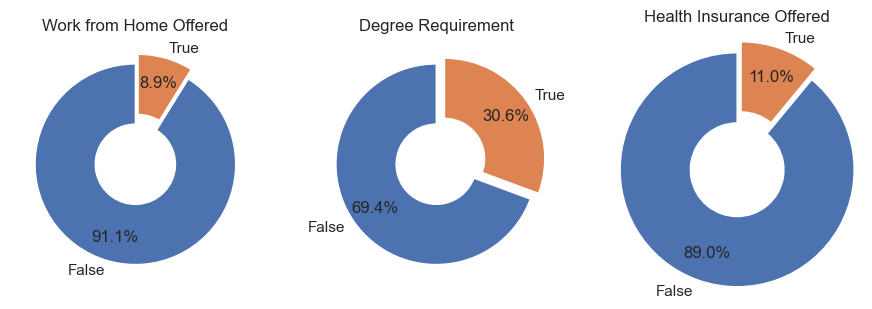

In [52]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

wedgeprops = {'width': 0.6, 'edgecolor': 'w'}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, pctdistance=0.75, wedgeprops=wedgeprops,explode=(0, 0.1))
    ax[i].set_title(title)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

### Exploratory Data Analysis for Data Analyst Roles in The Netherlands

In [56]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for NL Data Analyst jobs

In [57]:
df_DA_NL = df[(df['job_country'] == 'Netherlands') & (df['job_title_short'] == 'Data Analyst')]

#### Job Locations to Explore

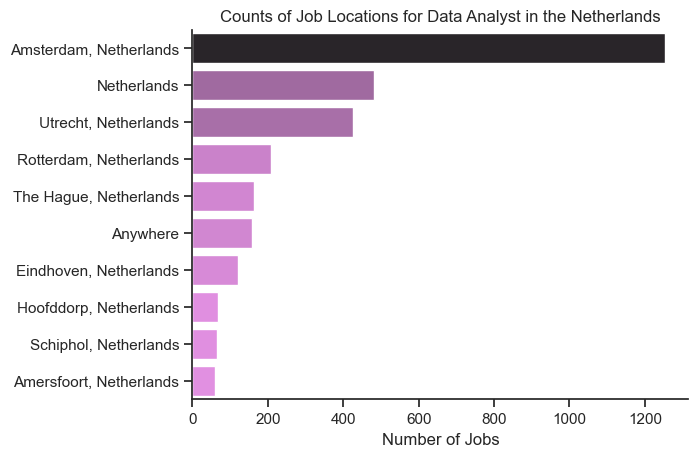

In [66]:
df_plot = df_DA_NL['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:violet_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the Netherlands')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

#### Job Opportunities

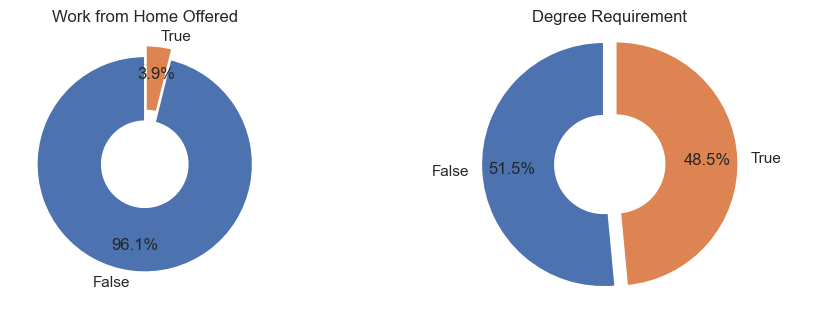

In [63]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2, figsize=(11, 3.5))

wedgeprops = {'width': 0.6, 'edgecolor': 'w'}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_NL[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90, pctdistance=0.75, wedgeprops=wedgeprops,explode=(0, 0.1))
    ax[i].set_title(title)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()

#### Companies to Explore

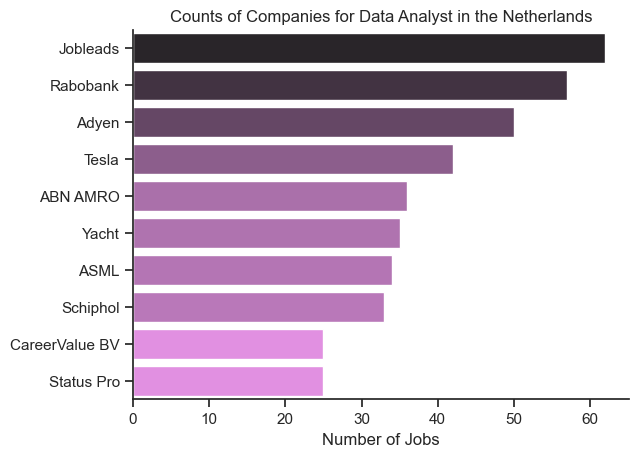

In [67]:
df_plot = df_DA_NL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:violet_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the Netherlands')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()